In [3]:
# Example usage cell
import base64
import requests
from IPython.display import Image as IPImage
from PIL import Image


def test_api(
    prompt, api_url, negative_prompt="", guidance_scale=7.5, num_inference_steps=30
):
    headers = {"X-API-Key": "your-secret-key-here", "Content-Type": "application/json"}

    data = {
        "prompt": prompt,
        "negative_prompt": negative_prompt,
        "guidance_scale": guidance_scale,
        "num_inference_steps": num_inference_steps,
    }

    response = requests.post(f"{api_url}/generate/", headers=headers, json=data)
    response.raise_for_status()

    result = response.json()
    if result["status"] == "success":
        image_data = base64.b64decode(result["image"])
        return IPImage(image_data)
    else:
        raise Exception(result.get("message", "Unknown error"))

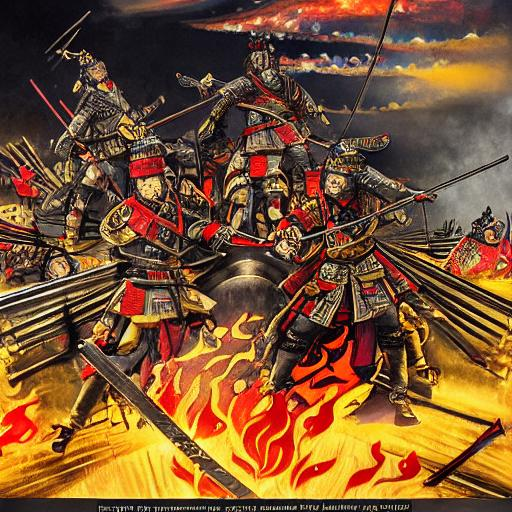

In [8]:
# Test the API
# Get the ngrok URL from the server output and replace it here
NGROK_URL = "https://99c3-35-185-172-23.ngrok-free.app/"

# Test image generation
result = test_api(
    prompt="Epic Sengoku-era battle during the Siege of Osaka. Samurai in ornate armor clash amid smoke, flames, and flying banners near the towering Osaka Castle under a stormy sunset sky. Dynamic poses, katanas, spears, and bows create a chaotic yet majestic scene. Wet ground reflects fiery light; intricate textures and cinematic lighting highlight armor and weapons. Octane-rendered, photorealistic masterpiece, evoking intense drama and historical grandeur.",
    api_url=NGROK_URL,
)
display(result)